### Near-miss January 8th 2025 ###

Systems were very tight on January 8th 2025 leading to around £21 million of balancing costs for the day.

We want to explore the meteorological drivers leading up to this event.

And also identify whether there is a strong correlation between the daily mean wind speed and daily mean temperature and the total balancing costs for a given day.

In [1]:
# import local modules
import sys
import os
import re
import glob
import time

# import third party modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set up the hard coded variables
bsuos_data_ii_path = "/home/users/benhutch/energy-sotcr-2024-2025/data/current_ii_bsuos_data.csv"

In [3]:
# import the data
balancing_df = pd.read_csv(bsuos_data_ii_path)

In [12]:
balancing_df.tail()

,Settlement Day,Settlement Period,BSUoS Tariff (£/MWh),BSUoS Fund Tariff (£/MWh),Volume (MWh),BSUoS Recovery (£),BSUoS Fund Recovery (£),BSUoS Total Recovery (£),Run Type,Actual BSUoS Cost (£),Settlement Datetime
13917,2025-01-15,44,12.17,NaN,17659.05,214910.64,0,214910.64,II,230019.59,2025-01-15 21:30:00
13918,2025-01-15,45,12.17,NaN,16777.86,204186.56,0,204186.56,II,192308.84,2025-01-15 22:00:00
13919,2025-01-15,46,12.17,NaN,15837.79,192745.90,0,192745.90,II,213824.06,2025-01-15 22:30:00
13920,2025-01-15,47,12.17,NaN,15028.37,182895.26,0,182895.26,II,243301.16,2025-01-15 23:00:00
13921,2025-01-15,48,12.17,NaN,14569.06,177305.46,0,177305.46,II,247804.39,2025-01-15 23:30:00


In [7]:
# print the first settletment day
print(balancing_df['Settlement Day'].min())

2024-04-01T00:00:00


In [8]:
# Strip any leading or trailing whitespace from the 'Settlement Day' column
balancing_df['Settlement Day'] = balancing_df['Settlement Day'].str.strip()

# Convert 'Settlement Day' to datetime
balancing_df['Settlement Day'] = pd.to_datetime(balancing_df['Settlement Day'], format='%Y-%m-%dT%H:%M:%S')

In [10]:
# Create a new column for Settlement Day Time in the format yyyy-mm-dd hh:mm:ss
# Calculate the time from 'Settlement Period'
balancing_df['Settlement Time'] = (balancing_df['Settlement Period'] - 1) * pd.Timedelta(minutes=30)

# Combine 'Settlement Day' and 'Settlement Time' to create 'Settlement Datetime'
balancing_df['Settlement Datetime'] = balancing_df['Settlement Day'] + balancing_df['Settlement Time']

# Drop the 'Settlement Time' column as it's no longer needed
balancing_df.drop(columns=['Settlement Time'], inplace=True)

In [13]:
# subset the data to 2025
balancing_df_2025 = balancing_df[balancing_df['Settlement Day'].dt.year == 2025]

Text(0, 0.5, 'Actual BSUoS Cost (£, millions)')

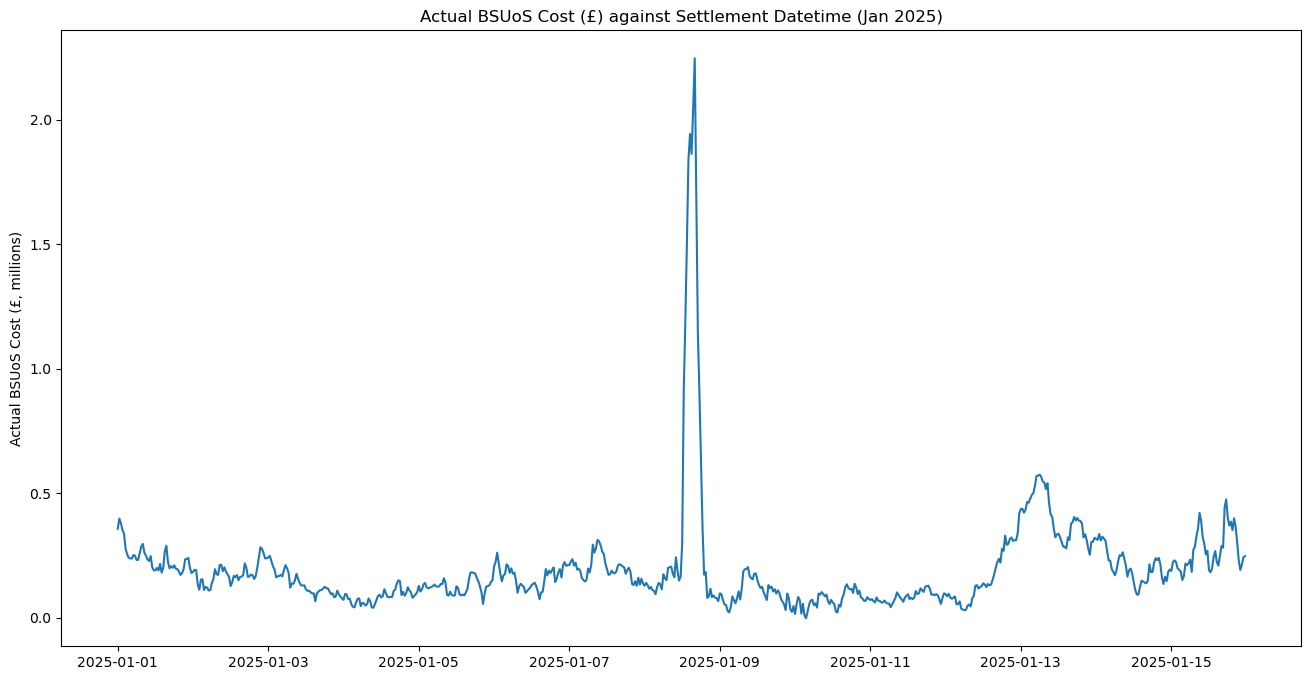

In [16]:
# plot the actual Actual BSUoS Cost (£) againt Settlement Datetime
# set up a figure
plt.figure(figsize=(16, 8))

# plot the data
plt.plot(balancing_df_2025['Settlement Datetime'], balancing_df_2025['Actual BSUoS Cost (£)'] / 1e6, label='Actual BSUoS Cost (£)')

# set the title
plt.title('Actual BSUoS Cost (£) against Settlement Datetime (Jan 2025)')

# set the y-axis label
plt.ylabel('Actual BSUoS Cost (£, millions)')

Text(0, 0.5, 'BSUoS Cost (£, millions)')

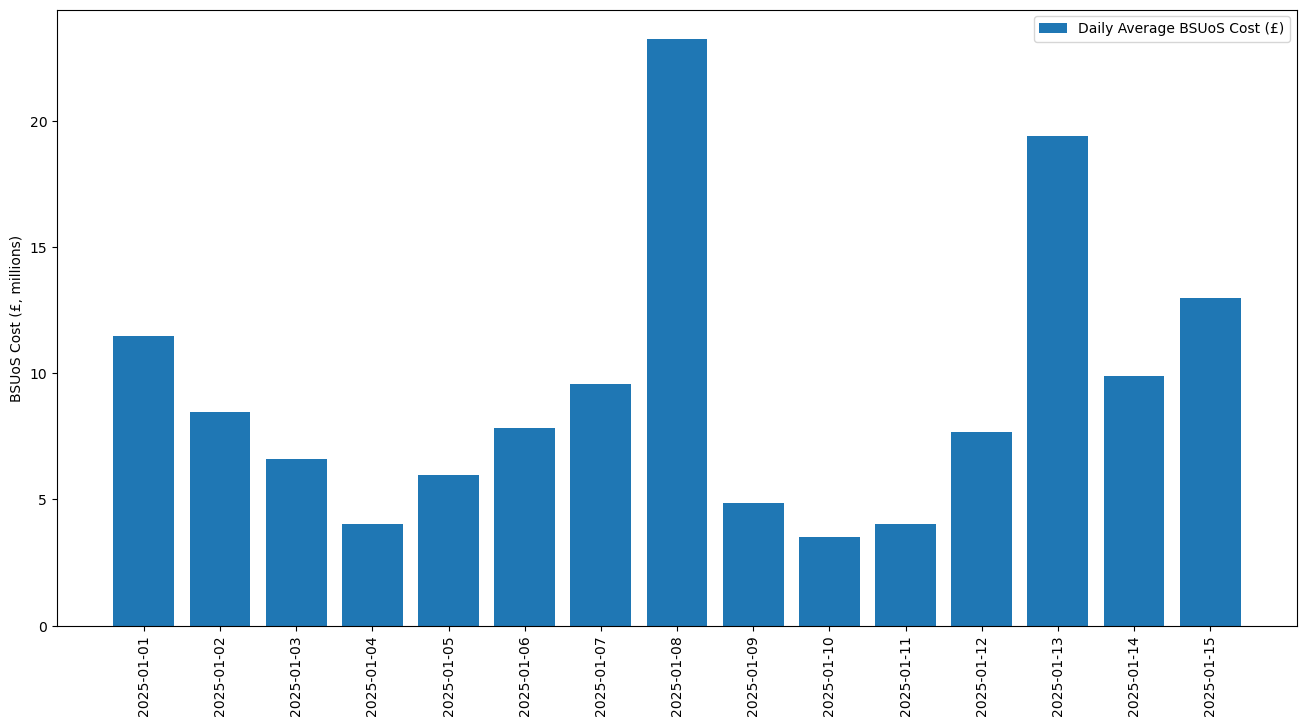

In [20]:
# aggregate the data for 2025 into daily averages
bsuos_cost_2025_daily = balancing_df_2025.groupby('Settlement Day').agg({'Actual BSUoS Cost (£)': 'sum'}).reset_index()

# set up the figure
plt.figure(figsize=(16, 8))

# plot the daily average BSUoS cost
plt.bar(bsuos_cost_2025_daily['Settlement Day'], bsuos_cost_2025_daily['Actual BSUoS Cost (£)'] / 1e6, label='Daily Average BSUoS Cost (£)')

# include dates for every day turned sideways
plt.xticks(bsuos_cost_2025_daily['Settlement Day'], rotation='vertical')

# add a legend
plt.legend()

# set up the y-axis label
plt.ylabel('BSUoS Cost (£, millions)')

In [21]:
# subset the full dataframe to months ONDJ
balancing_df_ONDJ = balancing_df[(balancing_df['Settlement Day'].dt.month.isin([10, 11, 12, 1]))]

In [22]:
# aggregate the daily average BSUoS cost for ONDJ
bsuos_cost_ONDJ_daily = balancing_df_ONDJ.groupby('Settlement Day').agg({'Actual BSUoS Cost (£)': 'sum'}).reset_index()

Text(0.5, 1.0, 'Daily Average BSUoS Cost (£) for ONDJ')

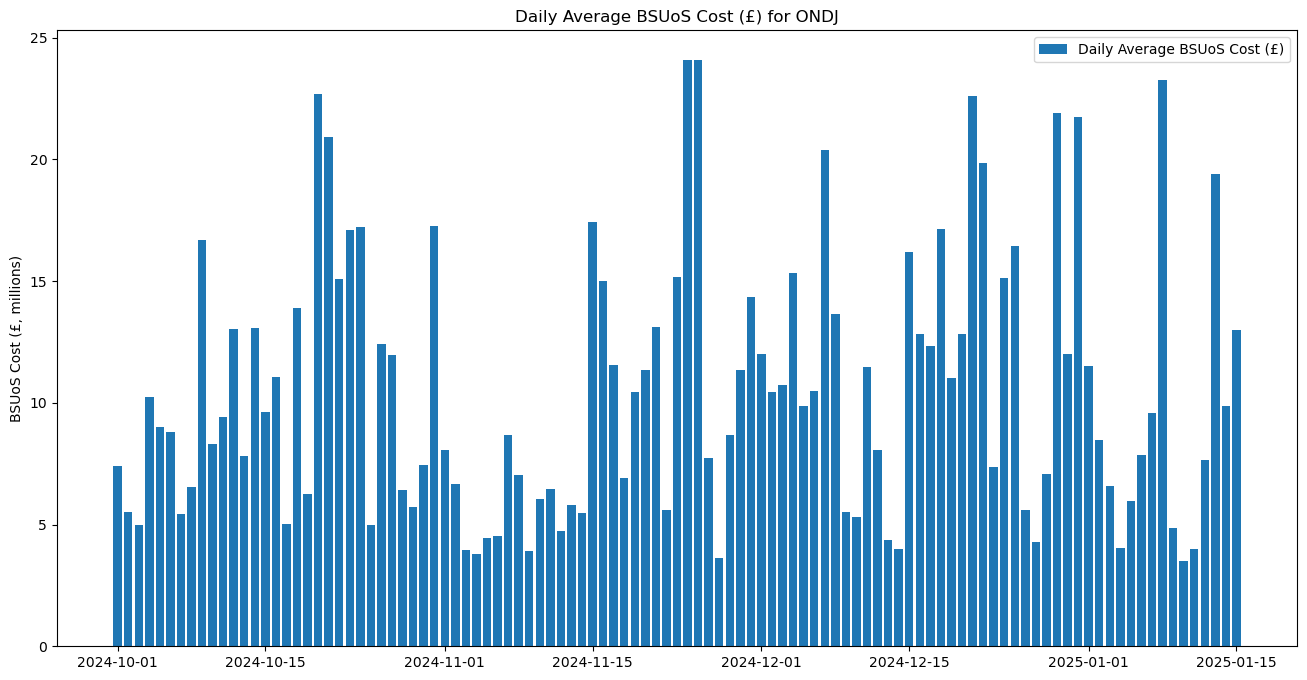

In [24]:
# plot the daily average BSUoS cost for ONDJ
plt.figure(figsize=(16, 8))

plt.bar(bsuos_cost_ONDJ_daily['Settlement Day'], bsuos_cost_ONDJ_daily['Actual BSUoS Cost (£)'] / 1e6, label='Daily Average BSUoS Cost (£)')

# plt.xticks(bsuos_cost_ONDJ_daily['Settlement Day'], rotation='vertical')

plt.legend()

plt.ylabel('BSUoS Cost (£, millions)')
plt.title('Daily Average BSUoS Cost (£) for ONDJ')